<a href="https://colab.research.google.com/github/ravikanth995/New_Projects/blob/master/Sales_of_Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
df = pd.read_csv('sales.csv', encoding = 'unicode escape')
df.head(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,...,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Medium
6,10180,29,86.13,9,2497.77,11/11/2003 0:00,Shipped,4,11,2003,...,"184, chausse de Tournai",NaN,Lille,NaN,59000,France,EMEA,Rance,Martine,Small
7,10188,48,100.00,1,5512.32,11/18/2003 0:00,Shipped,4,11,2003,...,"Drammen 121, PR 744 Sentrum",NaN,Bergen,NaN,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
8,10201,22,98.57,2,2168.54,12/1/2003 0:00,Shipped,4,12,2003,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Small
9,10211,41,100.00,14,4708.44,1/15/2004 0:00,Shipped,1,1,2004,...,"25, rue Lauriston",NaN,Paris,NaN,75016,France,EMEA,Perrier,Dominique,Medium


In [ ]:
print("Shape of the Data : (Rows, Columns)  =", df.shape)

Shape of the Data : (Rows, Columns)  = (2823, 25)


In [ ]:
print("Null Values:\n", df.isnull().sum())

Null Values:
 ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


So there are 2521 empty values in Address Line 1, 1486 in STATE, 76 in Postal Code and 1074 in Territory Column.
 **bold text**

# **Data Cleaning and Statistical Analysis**

In [ ]:
df = df.drop(['STATE', 'ADDRESSLINE2', 'POSTALCODE', 'TERRITORY'], axis = 1)


In [ ]:
df.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
COUNTRY             0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

**The Null data have been cleared and cleaned**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  CITY              2823 non-null   object 


In [ ]:
df[['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']].describe()

,QUANTITYORDERED,PRICEEACH,SALES,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000
mean,35.092809,83.658544,3553.889072,100.715551
std,9.741443,20.174277,1841.865106,40.187912
min,6.000000,26.880000,482.130000,33.000000
25%,27.000000,68.860000,2203.430000,68.000000
50%,35.000000,95.700000,3184.800000,99.000000
75%,43.000000,100.000000,4508.000000,124.000000
max,97.000000,100.000000,14082.800000,214.000000


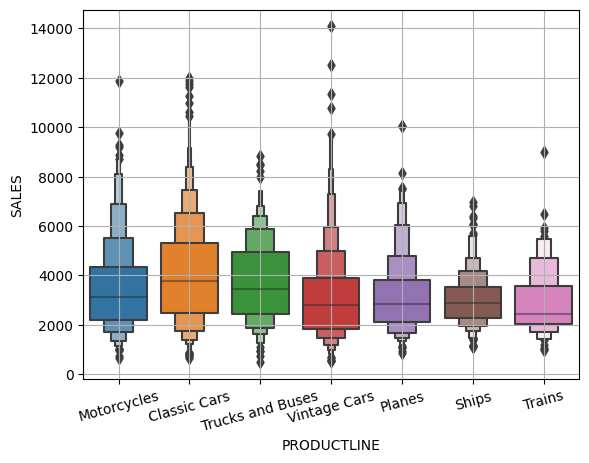

In [ ]:
sns.boxenplot(x = 'PRODUCTLINE', y = 'SALES', data = df)
plt.xticks(rotation = 15)
plt.grid(True)

In [ ]:
df[['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']].value_counts().head(20)

QUANTITYORDERED  PRICEEACH  SALES    MSRP
46               100.00     7381.16  163     2
31               33.24      1030.44  35      2
37               100.00     4405.22  146     2
46               100.00     5984.14  122     2
44               100.00     5565.12  148     2
26               100.00     3188.12  147     2
24               90.52      2172.48  90      2
50               100.00     5182.00  115     2
34               50.21      1707.14  61      2
                 100.00     8014.82  214     2
31               90.17      2795.27  101     2
32               100.00     4181.44  116     2
                 87.60      2803.20  76      2
47               62.45      2935.15  61      2
40               79.62      3184.80  85      2
35               47.62      1666.70  54      2
39               59.16      2307.24  68      2
20               72.98      1459.60  65      2
47               100.00     5464.69  117     2
40               100.00     4931.60  127     1
dtype: int64

In [ ]:
df[['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']].sort_values(by = ['PRICEEACH'], ascending= False)

,QUANTITYORDERED,PRICEEACH,SALES,MSRP
842,43,100.00,5950.34,168
1021,21,100.00,3734.01,169
1041,42,100.00,6401.22,169
1040,20,100.00,3928.60,169
1039,29,100.00,4812.55,169
...,...,...,...,...
1549,42,29.21,1226.82,33
1551,20,28.88,577.60,33
1724,32,28.29,905.28,35
1543,37,27.22,1007.14,33


In [ ]:
print("Total Sales is :", df['SALES'].sum())
print("-"*90)
print("Total Price of Each is :", df['PRICEEACH'].sum())
print('-'*90)
print("The Year, Month and Date on which the Maximum SALES were placed :", df[['YEAR_ID','MONTH_ID', 'ORDERDATE', 'SALES']].max())
print("-"*90)
print("The Year, Month and Date on which the Minimum SALES were placed :", df[['YEAR_ID','MONTH_ID','ORDERDATE', 'SALES']].min())
print("-"*90)

Total Sales is : 10032628.85
------------------------------------------------------------------------------------------
Total Price of Each is : 236168.07
------------------------------------------------------------------------------------------
The Year, Month and Date on which the Maximum SALES were placed : YEAR_ID               2005
MONTH_ID                12
ORDERDATE    9/9/2004 0:00
SALES              14082.8
dtype: object
------------------------------------------------------------------------------------------
The Year, Month and Date on which the Minimum SALES were placed : YEAR_ID                2003
MONTH_ID                  1
ORDERDATE    1/10/2003 0:00
SALES                482.13
dtype: object
------------------------------------------------------------------------------------------


Maximum sales was observed in the month of December and minimum in the January month.

In [ ]:
total_sales_by_product_line = df.groupby('PRODUCTLINE')['SALES'].sum().reset_index()

print(total_sales_by_product_line)


        PRODUCTLINE       SALES
0      Classic Cars  3919615.66
1       Motorcycles  1166388.34
2            Planes   975003.57
3             Ships   714437.13
4            Trains   226243.47
5  Trucks and Buses  1127789.84
6      Vintage Cars  1903150.84


In [ ]:
product_line_highest_sales = total_sales_by_product_line.loc[total_sales_by_product_line['SALES'].idxmax()]

print("Product Line with the Highest Total Sales:")
print(product_line_highest_sales)


Product Line with the Highest Total Sales:
PRODUCTLINE    Classic Cars
SALES            3919615.66
Name: 0, dtype: object


In [ ]:
print("The Year, Month and Date on which the Maximum SALES were placed :", df[['YEAR_ID','MONTH_ID', 'ORDERDATE', 'PRODUCTLINE', 'SALES']].max(axis = 0))

The Year, Month and Date on which the Maximum SALES were placed : YEAR_ID                 2005
MONTH_ID                  12
ORDERDATE      9/9/2004 0:00
PRODUCTLINE     Vintage Cars
SALES                14082.8
dtype: object


In [ ]:
print("The Year, Month and Date on which the Maximum SALES were placed :", df[['YEAR_ID','MONTH_ID', 'ORDERDATE', 'PRODUCTLINE', 'SALES']].min(axis = 0))


The Year, Month and Date on which the Maximum SALES were placed : YEAR_ID                  2003
MONTH_ID                    1
ORDERDATE      1/10/2003 0:00
PRODUCTLINE      Classic Cars
SALES                  482.13
dtype: object


In [ ]:
average_price_by_product_line = df.groupby('PRODUCTLINE')['PRICEEACH'].mean().reset_index()

print(average_price_by_product_line)


        PRODUCTLINE  PRICEEACH
0      Classic Cars  87.335781
1       Motorcycles  82.997553
2            Planes  81.740915
3             Ships  83.855470
4            Trains  75.654675
5  Trucks and Buses  87.527940
6      Vintage Cars  78.148204


# **Exploratory Data Analysis**

In [ ]:
fig = px.funnel(df, x='PRODUCTLINE', y='SALES')
fig.show()


**Classis Cars, Motocycles and Vintage Cars are the most sold cars**

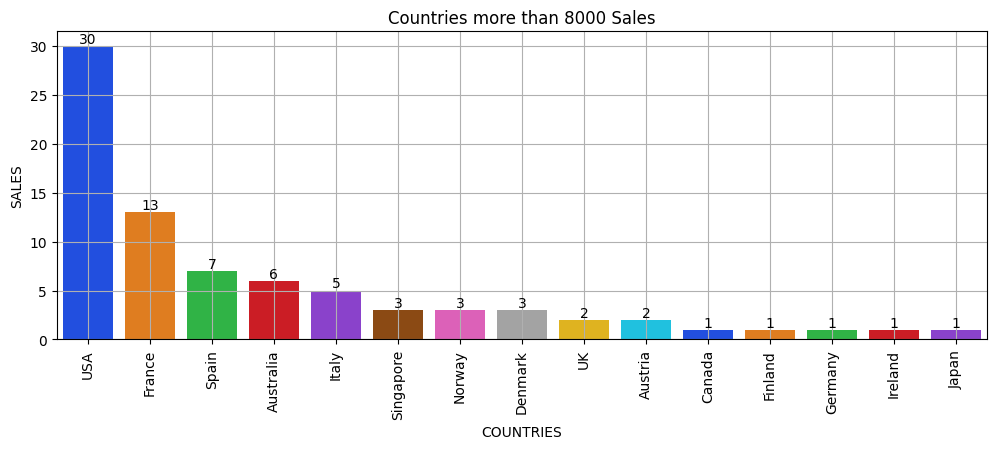

In [ ]:

filtered_data = df[df['SALES'] > 8000]


data_group = filtered_data['COUNTRY'].value_counts().reset_index(name='COUNT')

plt.figure(figsize=(12, 4))
ax = sns.barplot(x='index', y='COUNT', data=data_group, palette = 'bright')

plt.bar_label(ax.containers[0])

plt.xlabel('COUNTRIES')
plt.ylabel('SALES')
plt.title('Countries more than 8000 Sales')

plt.xticks(rotation = 90)
plt.grid(True)
plt.show()


The USA has more product lines sold than any other.

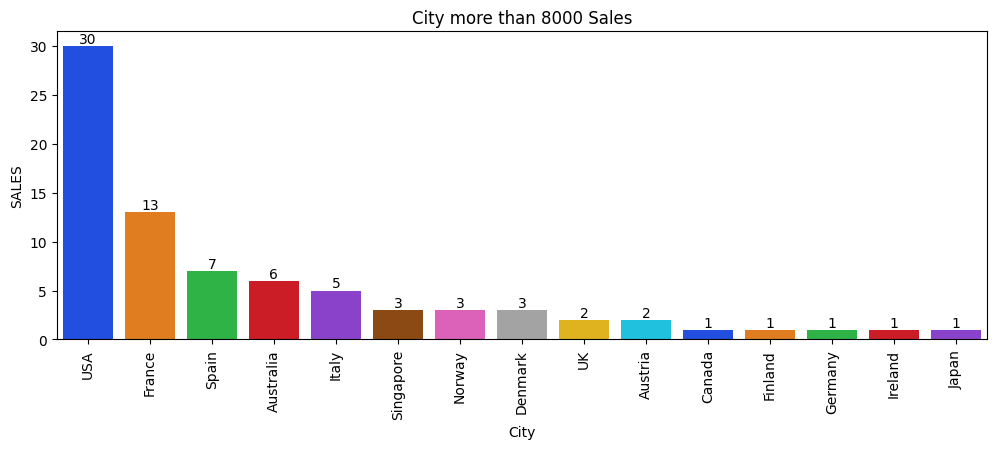

In [ ]:

filtered_data = df[df['SALES'] > 8000]


data_group = filtered_data['COUNTRY'].value_counts().reset_index(name='COUNT')

plt.figure(figsize=(12, 4))
ax = sns.barplot(x='index', y='COUNT', data=data_group, palette = 'bright')

plt.bar_label(ax.containers[0])

plt.xlabel('City')
plt.ylabel('SALES')
plt.title('City more than 8000 Sales')

plt.xticks(rotation = 90)
# plt.grid(True)
plt.show()


**The Sun Rafael and Madrid cities has the most productlines sold followed by the Paris and San Fransisco.**

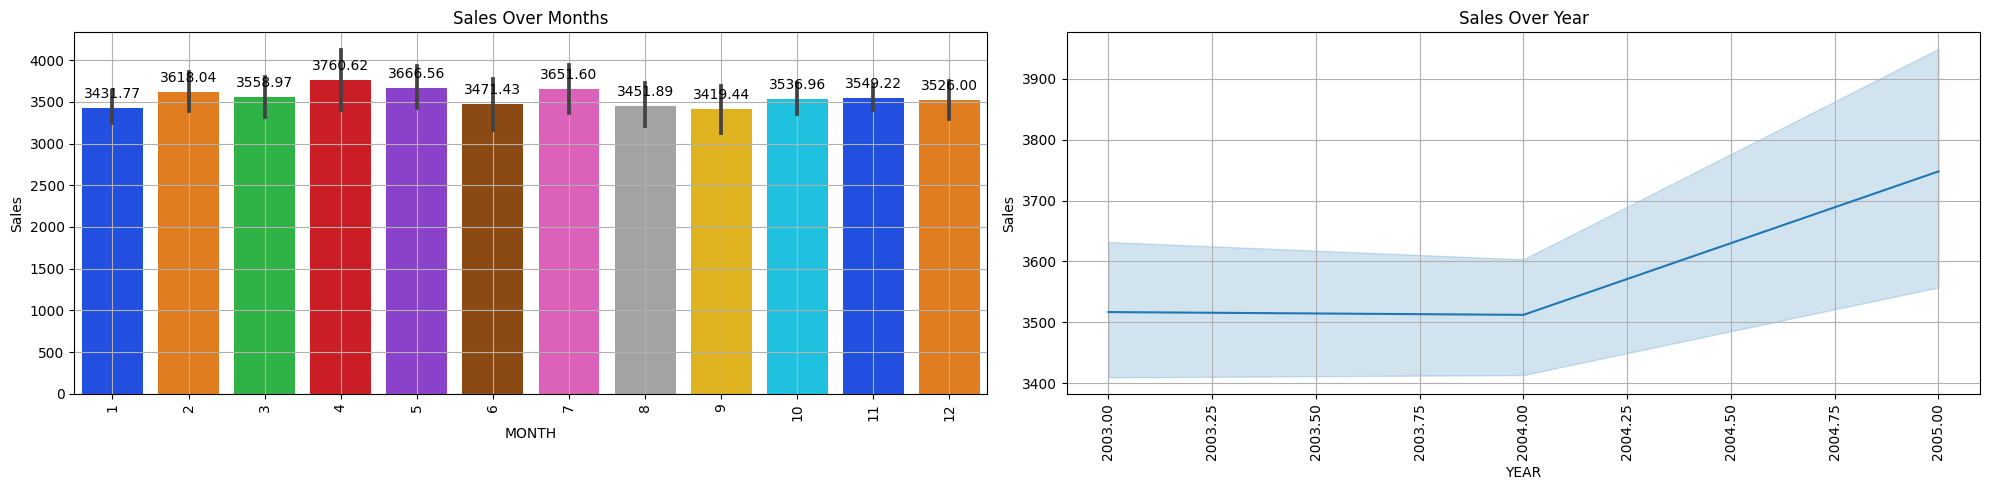

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

sns.barplot(x='MONTH_ID', y='SALES', data=df, ax=axes[0], palette ='bright')
axes[0].set_title('Sales Over Months')
axes[0].set_xlabel('MONTH')
axes[0].set_ylabel('Sales')
axes[0].grid(True)
axes[0].tick_params(axis='x', rotation=90)
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points', rotation=0)


sns.lineplot(x='YEAR_ID', y='SALES', data=df, ax=axes[1])
axes[1].set_title('Sales Over Year')
axes[1].set_xlabel('YEAR')
axes[1].set_ylabel('Sales')
axes[1].grid(True)
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()

plt.show()


### **Highest Productlines sold has in April Month, May, July and Feb Months and On a year wise, after 2004, it has been in steady pace.**

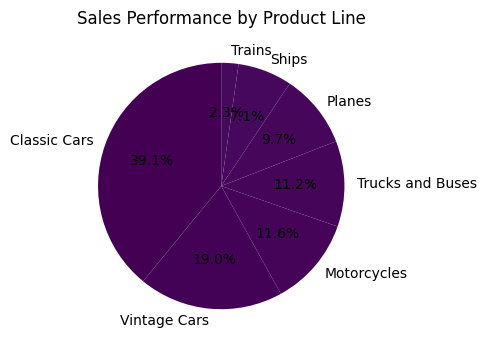

In [ ]:
sales_by_product_line = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
plt.pie(sales_by_product_line, labels=sales_by_product_line.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.viridis.colors)
plt.title('Sales Performance by Product Line')

plt.show()


Classic cars are sold about 39%, Vintage cars about 19%, Motorcars about 11.6%.

**Summary :**  The Sales over the months of April, May, July and Feb appears to have highest sales than rest of year and aftermath, 2004, sales appears to be accelerating.

Claasic Cars, Vintage cars and Motorcycles are excelled in the selling.
Inorder to sell the products, company needs to invest in USA and France for the better market and opportunities.

San Rafael and Madrid has the highest chance of better getting market for companies.